In [1]:
import numpy as np
import torch
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import rcParams
from utils.utils import *

np.random.seed(2)

In [2]:
# Set device
print(f'The device used in this notebook is: {setDevice()}')

DEVICE = setDevice()

The device used in this notebook is: cuda


## Import data

In [3]:
# Set settings
features, input_window, output_window, stride = set_settings()

print(f'features: {features}')
print(f'input_window: {input_window}')
print(f'output_window: {output_window}')
print(f'stride: {stride}')

features: ['Hips Flexion-Extension Left']
input_window: 100
output_window: 1
stride: 1


In [4]:
file_dir = r'D:\Study 2 Data\Healthy Gait\Train' 
# file_dir = r'D:\Study 2 Data\CP Gait\Train'
train_files = os.listdir(file_dir) 

# Changes the working directory to get the data from their location 
os.chdir(file_dir)
cwd = os.getcwd()

print(f'Current working directory is: {cwd}')
print(f"There are {len(train_files)} files in the specified path.")

Current working directory is: D:\Study 2 Data\Healthy Gait\Train
There are 7 files in the specified path.


In [5]:
train_files

['AB3154 BF T6-10.csv',
 'AB6751 BF T1-5.csv',
 'AB7422 BF T1-5.csv',
 'AB7779 BF T1-5.csv',
 'AB9119 BF T1-5.csv',
 'AB9737 BF T1-5.csv',
 'AB9737 BF T6-10.csv']

In [6]:
#Create feature list to extract values needed from CSV files
all_features = ['Trial', 'Time'] + features
all_features


['Trial', 'Time', 'Hips Flexion-Extension Left']

In [7]:
all_data = create_dataframe(train_files, all_features)

Extracting data from: AB3154 BF T6-10.csv
Extracting data from: AB6751 BF T1-5.csv
Extracting data from: AB7422 BF T1-5.csv
Extracting data from: AB7779 BF T1-5.csv
Extracting data from: AB9119 BF T1-5.csv
Extracting data from: AB9737 BF T1-5.csv
Extracting data from: AB9737 BF T6-10.csv


In [8]:
all_data.reset_index(drop=True, inplace=True) #reset the index of the table
# path = r'D:\Study 2 Data\Healthy Gait' + '\\' + 'all_data_healthy_train.csv'
# all_data.to_csv(path)

In [9]:
all_data

,Patient ID,Trial,Time,Hips Flexion-Extension Left
0,AB3154 BF T6-10,1,161.00,-1.76414
1,AB3154 BF T6-10,1,161.01,-1.71541
2,AB3154 BF T6-10,1,161.02,-1.66432
3,AB3154 BF T6-10,1,161.03,-1.60888
4,AB3154 BF T6-10,1,161.04,-1.54643
...,...,...,...,...
69453,AB9737 BF T6-10,14,474.70,5.59699
69454,AB9737 BF T6-10,14,474.71,5.45820
69455,AB9737 BF T6-10,14,474.72,5.31928
69456,AB9737 BF T6-10,14,474.73,5.17878


In [10]:
n_trials = all_data['Trial'].max()
print(f'maximum number of trials is: {n_trials}')

maximum number of trials is: 16


In [11]:
all_data['Patient ID'].unique()

array(['AB3154 BF T6-10', 'AB6751 BF T1-5', 'AB7422 BF T1-5',
       'AB7779 BF T1-5', 'AB9119 BF T1-5', 'AB9737 BF T1-5',
       'AB9737 BF T6-10'], dtype=object)

In [12]:
# Healthy Subjects 
train_subjects = [
 'AB9737 BF T1-5', 
 'AB9737 BF T6-10', 
'AB3154 BF T6-10',
 'AB6751 BF T1-5', 
 'AB7779 BF T1-5', 
 'AB7422 BF T1-5']

val_subjects = ['AB9119 BF T1-5']






In [13]:
val_subjects

['AB9119 BF T1-5']

In [14]:
train_data = all_data.loc[all_data['Patient ID'].isin(train_subjects)]

val_data = all_data.loc[all_data['Patient ID'].isin(val_subjects)]

In [15]:
print(f'all_data: {all_data.shape}')
print(f'train_data: {train_data.shape}')
print(f'val_data: {val_data.shape}')

all_data: (69458, 4)
train_data: (61289, 4)
val_data: (8169, 4)


In [16]:
train_samples = count_nsamples(train_data)
val_samples = count_nsamples(val_data)

For patient: AB3154 BF T6-10, trial: 1, there are: 651 time-points
For patient: AB3154 BF T6-10, trial: 2, there are: 541 time-points
For patient: AB3154 BF T6-10, trial: 3, there are: 613 time-points
For patient: AB3154 BF T6-10, trial: 4, there are: 601 time-points
For patient: AB3154 BF T6-10, trial: 5, there are: 711 time-points
For patient: AB3154 BF T6-10, trial: 6, there are: 651 time-points
For patient: AB3154 BF T6-10, trial: 7, there are: 1031 time-points
For patient: AB3154 BF T6-10, trial: 8, there are: 896 time-points
For patient: AB3154 BF T6-10, trial: 9, there are: 812 time-points
For patient: AB6751 BF T1-5, trial: 1, there are: 761 time-points
For patient: AB6751 BF T1-5, trial: 2, there are: 733 time-points
For patient: AB6751 BF T1-5, trial: 3, there are: 731 time-points
For patient: AB6751 BF T1-5, trial: 4, there are: 682 time-points
For patient: AB6751 BF T1-5, trial: 5, there are: 710 time-points
For patient: AB6751 BF T1-5, trial: 6, there are: 708 time-points


In [17]:
print(f'Number of train samples: {train_samples}')
print(f'Number of validation samples: {val_samples}')

Number of train samples: 69
Number of validation samples: 10


In [18]:
m = all_data['Patient ID'].unique()

In [19]:

def pd_to_np_converter(data, n_samples, features):
    #create a numpy array that stores the data for export
    sample_ID = []
    # patients = 2
    # n_trials = 10
    # # samples = patients * n_trials
    data_store = np.zeros((n_samples, 2000, len(features)), dtype=np.float32)
    i = 0

    for p in data['Patient ID'].unique(): #loop over patients 
        for t in data['Trial'].unique(): #loop over trials starting with trials 1 to trial 9 (inclusive)
            pd_array = data[(data['Patient ID'] == p) & (data['Trial'] == t)]
            if pd_array.empty:
                continue
                # print('DataFrame is empty!')
                # print(f'Trail {t} does not exist in {p}')
            else:
                np_array = pd_array.to_numpy()
                data_store[i, :np_array.shape[0], :] = np_array[:,3:] 
                sample_ID.append(p+ ' Ts'+str(t)) 
                i +=1

    return pd_array.columns, data_store


In [20]:
train_columns, train_data_np = pd_to_np_converter(train_data, train_samples, features)
val_columns, val_data_np = pd_to_np_converter(val_data, val_samples, features)

print(f'train_data_np.shape: {train_data_np.shape}')
print(f'val_data_np.shape: {val_data_np.shape}')

train_data_np.shape: (69, 2000, 1)
val_data_np.shape: (10, 2000, 1)


In [21]:
train_columns[3:].tolist() 

['Hips Flexion-Extension Left']

In [22]:
features == train_columns[3:].tolist() 

True

In [23]:
labels_keys = train_columns[3:].tolist() #copy the train columns removing the first column headers'Patient ID', 'Trial', 'Time'


if features == labels_keys: # check that the features are the same as the label keys 
    print('YAY! Column headers of dataframe match features')
else:
    print('ERROR: Features and labels_keys do not match!')

YAY! Column headers of dataframe match features


In [24]:
labels_keys = features 

labels_idx = np.arange(0, len(labels_keys), 1)

labels = dict(zip(labels_keys, labels_idx))

len(labels)
labels
# labels_keys

{'Hips Flexion-Extension Left': 0}

In [25]:
def window_generator_fltrd(sequence, input_window, output_window, stride, features, labels):
    """
    Trims the input sequence from leading and trailing zeros, then generates an array with input windows and another array for the corresponding output windows
    Args:
        sequence: (np.array, float32) columns are features while rows are time points
        features: (list, strin~g) column names
        input_window: (int)
        stride (int): the value the input window shifts along the sequence 
    Returns:

    """
    # shortest_seqLen = float('inf')

    # f_zeros = [] #array that stores the number of leading zeros for each feature
    b_zeros = [] #array that stores the number of trailing zeros for each feacture 

    for f in features:
        # trim the leading and training zeros
        # f_zeros.append(sequence[:,labels[f]].shape[0] - np.trim_zeros(sequence[:,labels[f]], 'f').shape[0]) #forward zeros
        b_zeros.append(sequence[:,labels[f]].shape[0] - np.trim_zeros(sequence[:,labels[f]], 'b').shape[0]) #backward zeros

    # max_f_zeros = max(f_zeros) #find the maximum number of leading zeros
    max_b_zeros = max(b_zeros) #find the maximum number of trailing/backward zeros 
    # print(max_b_zeros)

    #total sequence length minus max leading and trailing zeros 
    trimmed_seqLen = sequence[:,0].shape[0] - (max_b_zeros)
    trimmed_seqLen_reduced = trimmed_seqLen - 200 #reducing sequence size to remove the first and last 200 timesteps which may contain errors   
    print(f'trimmed_seqLen: {trimmed_seqLen}')
    print(f'trimmed_seqLen_reduced: {trimmed_seqLen_reduced}')


    # Slides are the number of times the input window can scan the sequence 
    # Using the equation that calculates the number of outputs as in convolution  (W – F + 2P) / S + 1, W=input image width, F=filter width, P=padding, S=stride
    # The width of the image is taken as the number of time steps in the sequence, corresponding to the length of any TRIMMED column in the data 
    slides = ((trimmed_seqLen_reduced - (input_window+output_window)) // stride) + 1
    print(f"number of slides is: {slides}")

    # Calculating the first index of each of the output sequences (first index always f_zeros as its always shifted to start with the first non-zero element)
    seq_indicies = (np.arange(slides) * stride) + 100

    if slides <= 0:
        raise ValueError("input window and output window length are greater than sequence length, check their values")

    # Creates an zero numpy array to store the samples in 
    X_values = np.zeros((len(seq_indicies) , input_window, len(features)))
    Y_values = np.zeros((len(seq_indicies), output_window, len(features)))

    # Loop through the features, then loop through the list of sequence indicies needed for input and output windows 
    for j, feature in enumerate(features):
        # print(j)
        # print(feature)
        for i, idx in enumerate(seq_indicies):
            X_values[i, :, j] = sequence[idx:idx+input_window, labels[feature]]
            Y_values[i, :, j] = sequence[idx+input_window:idx+input_window + output_window, labels[feature]]

    return X_values, Y_values 

In [26]:
def window_generator_lt_fltrd(sequence, input_window, future_window, stride, features, labels): #window gernerator long term fltrd (creats a validation window up to 200 timesteps in advance to measure error on long term future predictions)
    """
    Trims the input sequence from leading and trailing zeros, then generates an array with input windows and another array for the corresponding output windows
    Args:
        sequence: (np.array, float32) columns are features while rows are time points
        features: (list, strin~g) column names
        input_window: (int)
        stride (int): the value the input window shifts along the sequence 
    Returns:

    """
    b_zeros = [] #array that stores the number of trailing zeros for each feacture 

    for f in features:
        # trim the leading and training zeros
        b_zeros.append(sequence[:,labels[f]].shape[0] - np.trim_zeros(sequence[:,labels[f]], 'b').shape[0]) #backward zeros

    max_b_zeros = max(b_zeros) #find the maximum number of trailing/backward zeros 
    # print(max_b_zeros)

    fltrd_samples = 2 * 100 #remove 150 timesteps from the beggining and ending of the entire sequence
    # lt_len = 200 # number of timesteps to predict in the future based on a single input window (to be used in measuring errors based on prediction input)
    
    #total sequence length minus max leading and trailing zeros 
    trimmed_seqLen = sequence[:,0].shape[0] - (max_b_zeros)
    trimmed_seqLen_reduced = trimmed_seqLen - (fltrd_samples) # (- fltrd_samples is done to reduce sequence size to remove the first and last 150 timesteps which may contain errors since they corresponding to beggining and ending of the trials 
    print(f'trimmed_seqLen: {trimmed_seqLen}')
    print(f'trimmed_seqLen_reduced: {trimmed_seqLen_reduced}')


    # Slides are the number of times the input window can scan the sequence 
    # Using the equation that calculates the number of outputs as in convolution  (W – F + 2P) / S + 1, W=input image width, F=filter width, P=padding, S=stride
    # The width of the image is taken as the number of time steps in the sequence, corresponding to the length of any TRIMMED column in the data 
    slides = ((trimmed_seqLen_reduced - (input_window+future_window)) // stride) + 1
    print(f"number of slides is: {slides}")

    # Calculating the first index of each of the output sequences (first index always f_zeros as its always shifted to start with the first non-zero element)
    seq_indicies = (np.arange(slides) * stride) + 100

    if slides <= 0:
        raise ValueError("input window and output window length are greater than sequence length, check their values")
        # return None 

    # Creates an zero numpy array to store the samples in 
    X_values = np.zeros((len(seq_indicies) , input_window, len(features)))
    Y_values = np.zeros((len(seq_indicies), future_window, len(features)))

    # Loop through the features, then loop through the list of sequence indicies needed for input and output windows 
    for j, feature in enumerate(features):
        # print(j)
        # print(feature)
        for i, idx in enumerate(seq_indicies):
            X_values[i, :, j] = sequence[idx:idx+input_window, labels[feature]]
            Y_values[i, :, j] = sequence[idx+input_window:idx+input_window + future_window, labels[feature]]

    return X_values, Y_values 

In [27]:
# Creating training datasets
# Selecting the features to be used when creating windows 
approx_seq_len = 2000 # appoximate the length of the longest sequence that can be encountered 
# samples_per_file = ((approx_seq_len - (input_window+output_window)) // stride) + 1 #number of window samples generated per file 
samples_per_file = 900


# create a zero-filled 3D array with shape (number of samples * number of files, window size, number of features)
X_train_windows = np.zeros((samples_per_file*train_samples, input_window, len(features)), dtype=np.float32) #size can be reduced by decreasing train_size 
Y_train_windows = np.zeros((samples_per_file*train_samples, output_window, len(features)), dtype=np.float32) 


start_idx = 0 #setting start index to equal zero 
train_sample_sum = 0
train_excluded_samples = []
# Create training windows 

#for i in tqdm(range(train_size)): #Use for including all data including outliers 
for i in range(train_samples): 
       
    X_values, Y_values = window_generator_fltrd(
        train_data_np[i,:,:],
        input_window=input_window, 
        output_window=output_window, 
        stride=stride, 
        features=features,
        labels=labels
        )

    end_idx = start_idx + X_values.shape[0]

    # print(f'file number [{f}] start index: {start_idx}, end index: {end_idx}, number of samples: {X_values.shape[0]}')

    X_train_windows[start_idx:end_idx, :, :] = X_values
    Y_train_windows[start_idx:end_idx, :, :] = Y_values

    # print(f'number of samples copied: {X_train_data_store[start_idx:end_idx, :, :].shape[0]}')

    start_idx = end_idx 
    train_sample_sum += X_values.shape[0]

    # except Exception:
    #     exception_msg(i)
    #     train_excluded_samples.append(i)

# print(f"Completed storage of training windows samples, which contains {X_train_data_store.shape[0]} samples")
X_train_data = X_train_windows[:end_idx, :, :].astype('float64')
Y_train_data = Y_train_windows[:end_idx, :, :].astype('float64')


print(f'shape of X_train_windows: {X_train_windows.shape}')
print(f'shape of Y_train_windows: {Y_train_windows.shape}')

print(f'shape of X_train_data: {X_train_data.shape}')
print(f'shape of Y_train_data: {Y_train_data.shape}')

trimmed_seqLen: 651
trimmed_seqLen_reduced: 451
number of slides is: 351
trimmed_seqLen: 541
trimmed_seqLen_reduced: 341
number of slides is: 241
trimmed_seqLen: 613
trimmed_seqLen_reduced: 413
number of slides is: 313
trimmed_seqLen: 601
trimmed_seqLen_reduced: 401
number of slides is: 301
trimmed_seqLen: 711
trimmed_seqLen_reduced: 511
number of slides is: 411
trimmed_seqLen: 651
trimmed_seqLen_reduced: 451
number of slides is: 351
trimmed_seqLen: 1031
trimmed_seqLen_reduced: 831
number of slides is: 731
trimmed_seqLen: 896
trimmed_seqLen_reduced: 696
number of slides is: 596
trimmed_seqLen: 812
trimmed_seqLen_reduced: 612
number of slides is: 512
trimmed_seqLen: 761
trimmed_seqLen_reduced: 561
number of slides is: 461
trimmed_seqLen: 733
trimmed_seqLen_reduced: 533
number of slides is: 433
trimmed_seqLen: 731
trimmed_seqLen_reduced: 531
number of slides is: 431
trimmed_seqLen: 682
trimmed_seqLen_reduced: 482
number of slides is: 382
trimmed_seqLen: 710
trimmed_seqLen_reduced: 510
nu

In [28]:
# Creating validation datasets
# Selecting the features to be used when creating windows 
approx_seq_len = 2000 # appoximate the length of the longest sequence that can be encountered 
# samples_per_file = ((approx_seq_len - (input_window+output_window)) // stride) + 1 #number of window samples generated per file 
samples_per_file = 1600


# create a zero-filled 3D array with shape (number of samples * number of files, window size, number of features)
X_val_windows = np.zeros((samples_per_file*val_samples, input_window, len(features)), dtype=np.float32) #size can be reduced by decreasing train_size 
Y_val_windows = np.zeros((samples_per_file*val_samples, output_window, len(features)), dtype=np.float32) 


start_idx = 0 #setting start index to equal zero 
val_sample_sum = 0
val_excluded_samples = []
# Create training windows 

#for i in tqdm(range(train_size)): #Use for including all data including outliers 
for i in range(val_samples): 
       
    X_values, Y_values = window_generator_fltrd(
        val_data_np[i,:,:],
        input_window=input_window, 
        output_window=output_window, 
        stride=stride, 
        features=features,
        labels=labels
        )

    end_idx = start_idx + X_values.shape[0]

    # print(f'file number [{f}] start index: {start_idx}, end index: {end_idx}, number of samples: {X_values.shape[0]}')

    X_val_windows[start_idx:end_idx, :, :] = X_values
    Y_val_windows[start_idx:end_idx, :, :] = Y_values

    # print(f'number of samples copied: {X_train_data_store[start_idx:end_idx, :, :].shape[0]}')

    start_idx = end_idx 
    val_sample_sum += X_values.shape[0]

    # except Exception:
    #     exception_msg(i)
    #     train_excluded_samples.append(i)

# print(f"Completed storage of training windows samples, which contains {X_train_data_store.shape[0]} samples")
X_val_data = X_val_windows[:end_idx, :, :].astype('float64')
Y_val_data = Y_val_windows[:end_idx, :, :].astype('float64')


print(f'shape of X_val_windows: {X_val_windows.shape}')
print(f'shape of Y_val_windows: {Y_val_windows.shape}')

print(f'shape of X_val_data: {X_val_data.shape}')
print(f'shape of Y_val_data: {Y_val_data.shape}')

trimmed_seqLen: 890
trimmed_seqLen_reduced: 690
number of slides is: 590
trimmed_seqLen: 1001
trimmed_seqLen_reduced: 801
number of slides is: 701
trimmed_seqLen: 831
trimmed_seqLen_reduced: 631
number of slides is: 531
trimmed_seqLen: 1051
trimmed_seqLen_reduced: 851
number of slides is: 751
trimmed_seqLen: 736
trimmed_seqLen_reduced: 536
number of slides is: 436
trimmed_seqLen: 766
trimmed_seqLen_reduced: 566
number of slides is: 466
trimmed_seqLen: 664
trimmed_seqLen_reduced: 464
number of slides is: 364
trimmed_seqLen: 764
trimmed_seqLen_reduced: 564
number of slides is: 464
trimmed_seqLen: 711
trimmed_seqLen_reduced: 511
number of slides is: 411
trimmed_seqLen: 755
trimmed_seqLen_reduced: 555
number of slides is: 455
shape of X_val_windows: (16000, 100, 1)
shape of Y_val_windows: (16000, 1, 1)
shape of X_val_data: (5169, 100, 1)
shape of Y_val_data: (5169, 1, 1)


In [29]:
# Creating validation datasets (long term predictions)
# Selecting the features to be used when creating windows 
approx_seq_len = 2000 # appoximate the length of the longest sequence that can be encountered 
# samples_per_file = ((approx_seq_len - (input_window+output_window)) // stride) + 1 #number of window samples generated per file 
samples_per_file = 1600

future_window = 200

# create a zero-filled 3D array with shape (number of samples * number of files, window size, number of features)
X_val_lt_windows = np.zeros((samples_per_file*val_samples, input_window, len(features)), dtype=np.float32) #size can be reduced by decreasing train_size 
Y_val_lt_windows = np.zeros((samples_per_file*val_samples, future_window, len(features)), dtype=np.float32) 


start_idx = 0 #setting start index to equal zero 
val_lt_sample_sum = 0
val_lt_excluded_samples = []
# Create training windows 

#for i in tqdm(range(train_size)): #Use for including all data including outliers 
for i in range(val_samples): 
       
    X_values, Y_values = window_generator_lt_fltrd(
        val_data_np[i,:,:],
        input_window=input_window, 
        future_window=future_window, 
        stride=stride, 
        features=features,
        labels=labels
        )

    end_idx = start_idx + X_values.shape[0]

    # print(f'file number [{f}] start index: {start_idx}, end index: {end_idx}, number of samples: {X_values.shape[0]}')

    X_val_lt_windows[start_idx:end_idx, :, :] = X_values
    Y_val_lt_windows[start_idx:end_idx, :, :] = Y_values

    # print(f'number of samples copied: {X_train_data_store[start_idx:end_idx, :, :].shape[0]}')

    start_idx = end_idx 
    val_lt_sample_sum += X_values.shape[0]

    # except Exception:
    #     exception_msg(i)
    #     train_excluded_samples.append(i)

# print(f"Completed storage of training windows samples, which contains {X_train_data_store.shape[0]} samples")
X_val_lt_data = X_val_lt_windows[:end_idx, :, :].astype('float64')
Y_val_lt_data = Y_val_lt_windows[:end_idx, :, :].astype('float64')


print(f'shape of X_val_lt_windows: {X_val_lt_windows.shape}')
print(f'shape of Y_val_lt_windows: {Y_val_lt_windows.shape}')

print(f'shape of X_val_lt_data: {X_val_lt_data.shape}')
print(f'shape of Y_val_lt_data: {Y_val_lt_data.shape}')

trimmed_seqLen: 890
trimmed_seqLen_reduced: 690
number of slides is: 391
trimmed_seqLen: 1001
trimmed_seqLen_reduced: 801
number of slides is: 502
trimmed_seqLen: 831
trimmed_seqLen_reduced: 631
number of slides is: 332
trimmed_seqLen: 1051
trimmed_seqLen_reduced: 851
number of slides is: 552
trimmed_seqLen: 736
trimmed_seqLen_reduced: 536
number of slides is: 237
trimmed_seqLen: 766
trimmed_seqLen_reduced: 566
number of slides is: 267
trimmed_seqLen: 664
trimmed_seqLen_reduced: 464
number of slides is: 165
trimmed_seqLen: 764
trimmed_seqLen_reduced: 564
number of slides is: 265
trimmed_seqLen: 711
trimmed_seqLen_reduced: 511
number of slides is: 212
trimmed_seqLen: 755
trimmed_seqLen_reduced: 555
number of slides is: 256
shape of X_val_lt_windows: (16000, 100, 1)
shape of Y_val_lt_windows: (16000, 200, 1)
shape of X_val_lt_data: (3179, 100, 1)
shape of Y_val_lt_data: (3179, 200, 1)


In [30]:
X_train_norm, scalars = normalise_fit(X_train_data)
Y_train_norm = normalise_transform(Y_train_data, scalars)

X_val_norm = normalise_transform(X_val_data, scalars)
Y_val_norm = normalise_transform(Y_val_data, scalars)

X_val_lt_norm = normalise_transform(X_val_lt_data, scalars)
Y_val_lt_norm = normalise_transform(Y_val_lt_data, scalars)


scalars

array([[-30.96504974],
       [ 63.01054001]])

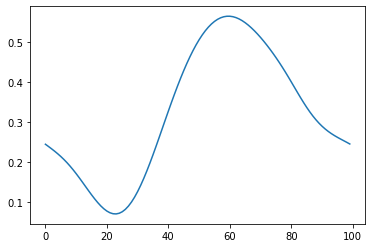

In [31]:
plt.plot(X_train_norm[2089,:])

In [32]:
# Convert to Tensor 
# do not store on GPU (yet)
X_train = torch.from_numpy(X_train_norm[:,:,0]).to(torch.float64)
Y_train = torch.from_numpy(Y_train_norm[:,:,0]).to(torch.float64)

# X_val = torch.from_numpy(X_val_norm).float()

# X_val_resized = np.expand_dims(Y_val_norm[:,0,:], axis=1)
# Y_val = torch.from_numpy(X_val_resized).float()

X_val = torch.from_numpy(X_val_norm[:,:,0]).to(torch.float64)
Y_val = torch.from_numpy(Y_val_norm[:,:,0]).to(torch.float64)


X_val_lt = torch.from_numpy(X_val_lt_norm[:,:,0]).to(torch.float64)
Y_val_lt = torch.from_numpy(Y_val_lt_norm[:,:,0]).to(torch.float64)


print(f'X_train shape: {X_train.shape}')
print(f'Y_train shape: {Y_train.shape}')

print(f'X_val shape: {X_val.shape}')
print(f'Y_val shape: {Y_val.shape}')

print(f'X_val_lt shape: {X_val_lt.shape}') #long term predictions
print(f'Y_val_lt shape: {Y_val_lt.shape}') #long term predictions




X_train shape: torch.Size([40589, 100])
Y_train shape: torch.Size([40589, 1])
X_val shape: torch.Size([5169, 100])
Y_val shape: torch.Size([5169, 1])
X_val_lt shape: torch.Size([3179, 100])
Y_val_lt shape: torch.Size([3179, 200])


In [33]:
X_val.dtype

torch.float64

In [34]:
train_dataset = gaitDataset(X_train, Y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle = True)
# train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle = True)

val_dataset = gaitDataset(X_val, Y_val) #ADJUSTED
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=True)
# val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=True)



# val_lt_dataset = gaitDataset(X_val_lt, Y_val_lt) #long term predictions
# val_lt_dataloader = DataLoader(val_lt_dataset, batch_size=32, shuffle=True)


print(f"Train Dataset length: {len(train_dataset)}")
print(f"Val Dataset length: {len(val_dataset)}")
# print(f"Val_lt Dataset length: {len(val_lt_dataset)}")


Train Dataset length: 40589
Val Dataset length: 5169


## Model training


In [35]:
from utils.utils import *
from matplotlib import rcParams


In [36]:
data.shape

NameError: name 'data' is not defined

In [ ]:
plt.plot(data[1,:])
plt.plot(data[3,:])
plt.plot(data[99,:])

In [37]:
data.shape

NameError: name 'data' is not defined

In [38]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# import numpy as np
# import matplotlib
# matplotlib.use('Agg')
# import matplotlib.pyplot as plt

# class Sequence(nn.Module):
#     def __init__(self):
#         super(Sequence, self).__init__()
#         self.lstm1 = nn.LSTMCell(1, 51) #(input_size, hidden size)
#         self.lstm2 = nn.LSTMCell(51, 51) 
#         self.linear = nn.Linear(51, 1) #(hidden_dims, outputsize )

#     def forward(self, input, future = 0): #input.shape = (batch_size, timesteps) e.g.[97, 999]
#         outputs = [] 
#         print(f'input.shape {input.shape}')
#         h_t = torch.zeros(input.size(0), 51, dtype=torch.double)
#         c_t = torch.zeros(input.size(0), 51, dtype=torch.double)
#         h_t2 = torch.zeros(input.size(0), 51, dtype=torch.double)
#         c_t2 = torch.zeros(input.size(0), 51, dtype=torch.double)

#         for input_t in input.split(1, dim=1):
#             print(f'input.split(1, dim=1): {input_t.shape}')
#             h_t, c_t = self.lstm1(input_t, (h_t, c_t))
#             print(f'h_t: {h_t.shape}')
#             h_t2, c_t2 = self.lstm2(h_t, (h_t2, c_t2))
#             output = self.linear(h_t2)
#             outputs += [output]
#         for i in range(future):# if we should predict the future
#             h_t, c_t = self.lstm1(output, (h_t, c_t))
#             h_t2, c_t2 = self.lstm2(h_t, (h_t2, c_t2))
#             output = self.linear(h_t2)
#             outputs += [output]
#         outputs = torch.cat(outputs, dim=1)
#         return outputs




In [39]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

class Sequence(nn.Module):
    def __init__(self):
        super(Sequence, self).__init__()
        self.lstm1 = nn.LSTM(input_size = 1, hidden_size = 100, num_layers=2, batch_first=True) #(input_size, hidden size)
        # self.lstm2 = nn.LSTMCell(51, 51) 
        self.linear = nn.Linear(100, 1) #(hidden_dims, outputsize )

    def forward(self, input, future = 0): #input.shape = (batch_size, timesteps) e.g.[97, 999]
        outputs = [] 
        
        # print(f'input.shape {input.shape}')
        h_t = torch.zeros(2, input.size(0), 100, dtype=torch.double).to(DEVICE)
        c_t = torch.zeros(2, input.size(0), 100, dtype=torch.double).to(DEVICE)
        # h_t2 = torch.zeros(input.size(0), 51, dtype=torch.double)
        # c_t2 = torch.zeros(input.size(0), 51, dtype=torch.double)

        for input_t in input.split(1, dim=1):

            in_data= torch.unsqueeze(input=input_t, dim=1)
            # print(f'input.split(1, dim=1): {in_data.shape}')
            out, (h_t, c_t) = self.lstm1(in_data, (h_t, c_t))
            # print(f'h_t[-1]: {h_t[-1].shape}')
            # h_t2, c_t2 = self.lstm2(h_t, (h_t2, c_t2))
            output = self.linear(h_t[-1])
            # print(f'output of fist loop: {output.shape}')
            outputs += [output]
        # print(f'we are done now yay: output.shape {output.shape}')
        for i in range(future):# if we should predict the future
            out_data= torch.unsqueeze(input=output, dim=1)
            # print(f'out_data.shape: {i} + {out_data.shape}')
            out, (h_t, c_t) = self.lstm1(out_data, (h_t, c_t))
            # h_t2, c_t2 = self.lstm2(h_t, (h_t2, c_t2))
            output = self.linear(h_t[-1])
            outputs += [output]
        outputs = torch.cat(outputs, dim=1)
        return outputs


In [ ]:
import torch.optim as optim
# T = 20
# L = 1000
# N = 100

# x = np.empty((N, L), 'int64')
# x[:] = np.array(range(L)) + np.random.randint(-4 * T, 4 * T, N).reshape(N, 1)
# data = np.sin(x / 1.0 / T).astype('float64')
# torch.save(data, open('traindata.pt', 'wb'))

# np.random.seed(0)
# torch.manual_seed(0)
# # load data and make training set
# # data = torch.load('traindata.pt')
# input = torch.from_numpy(data[3:, :-1])
# target = torch.from_numpy(data[3:, 1:])
# test_input = torch.from_numpy(data[:3, :-1])
# test_target = torch.from_numpy(data[:3, 1:])

In [ ]:
input.shape

In [ ]:
target.shape

In [ ]:
# input.shape

In [ ]:
X_train.shape

In [ ]:
X_val.shape

In [ ]:
input = X_train[:,:-1]
target = X_train[:,1:]

test_input = X_val[:, :-1]
test_target = X_val[:,1:]

In [ ]:
test_target[0,:].cpu().numpy()
plt.plot(test_target[200,:].cpu().numpy())

In [ ]:
input.shape

In [ ]:
target.shape

In [ ]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class create_dataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.len = x.shape[0]
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]
    def __len__(self):
        return self.len
    
ds = create_dataset(input, target)

train_loader = DataLoader(ds, shuffle = True, batch_size = 128)

In [ ]:
# build the model
seq = Sequence().to(DEVICE)
seq.double()
criterion = nn.MSELoss()
# use LBFGS as optimizer since we can load the whole data to train
# optimizer = optim.Adam(seq.parameters(), lr=0.8)
optimizer = optim.Adam(seq.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=40, gamma=0.1)

#begin to train
for i in range(100):
    print('STEP: ', i)
    running_train_loss = 0.
    for input,target in train_loader:
        input, target = input.to(DEVICE), target.to(DEVICE)
        # def closure():
        optimizer.zero_grad()
        out = seq(input)
        loss = criterion(out, target)
        # print('loss:', loss.item())
        running_train_loss += loss.item()
        loss.backward()
        optimizer.step()

    print(f"Epoch {i+1}, Loss: {running_train_loss/len(train_loader)}")
    # optimizer.zero_grad()
    # out = seq(input)
    # loss = criterion(out, target)
    # print('loss:', loss.item())
    # loss.backward()
   
    # optimizer.step()
    scheduler.step()
    # begin to predict, no need to track gradient here
    with torch.no_grad():
        future = 200
        test_input, test_target = test_input.to(DEVICE), test_target.to(DEVICE)
        pred = seq(test_input, future=future)
        loss = criterion(pred[:, :-future], test_target)
        print('test loss:', loss.item())
        y = pred.detach().cpu().numpy()
        # print(f'input.size(1): {input.size(1)}')
        # draw the result
        if i % 5 ==  0:
            plt.figure(figsize=(30,10))
            plt.title('Predict future values for time sequences\n(Dashlines are predicted values)', fontsize=30)
            plt.xlabel('x', fontsize=20)
            plt.ylabel('y', fontsize=20)
            plt.xticks(fontsize=20)
            plt.yticks(fontsize=20)
            def draw(yi, color):
                plt.plot(np.arange(input.size(1)), yi[:input.size(1)], color, linewidth = 2.0)
                plt.plot(np.arange(input.size(1), input.size(1) + future), yi[input.size(1):], color + ':', linewidth = 2.0)
            draw(y[0], 'r')
            draw(y[10], 'g')
            draw(y[29], 'b')
            # plt.savefig('predict%d.pdf'%i)
            # plt.close()

In [ ]:
plt.plot(y[1,:])
plt.plot(test_target[1,:].cpu().numpy())

In [ ]:
import torch.optim as optim
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)


In [ ]:
10 % 5

In [ ]:
seq = Sequence().to(DEVICE)
seq.double()

In [ ]:
def setDevice():
  DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
  return DEVICE

In [ ]:
# Set device
print(f'The device used in this notebook is: {setDevice()}')

DEVICE = setDevice()

In [ ]:
for i in range(50):
    loss = 0.0
    num_len = 0
    seq.train()
    for x,y in train_loader:
        x, y = x.to(DEVICE), y.to(DEVICE)
        batch_size = x.shape[0]
        y_pred = seq(x)
        optim.zero_grad()
        loss = criterion(y_pred, y)
        loss.backward()
        optim.step()
        num_len += batch_size
        loss += (batch_size * loss.item())
    loss = loss / (num_len)
    print(f"Epoch {i+1}, Loss: {loss}")
    
    with torch.no_grad():
        future = 1000
        test_input, test_target = test_input.to(DEVICE), test_target.to(DEVICE)
        pred = seq(test_input, future=future)
        loss = criterion(pred[:, :-future], test_target)
        print('test loss:', loss.item())
        print("==========================")
        y = pred.detach().cpu().numpy()
    
    plt.figure(figsize=(30,10))
    plt.title('Predict future values for time sequences\n(Dashlines are predicted values)', fontsize=30)
    plt.xlabel('x', fontsize=20)
    plt.ylabel('y', fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    def draw(yi, color):
        plt.plot(np.arange(input.size(1)), yi[:input.size(1)], color, linewidth = 2.0)
        plt.plot(np.arange(input.size(1), input.size(1) + future), yi[input.size(1):], color + ':', linewidth = 2.0)
    draw(y[0], 'r')
    draw(y[1], 'g')
    draw(y[2], 'b')
    # plt.savefig('predict%d.pdf'%i)
    # plt.close()

### Another tutorial:
https://www.kaggle.com/code/seangribben/lstm-time-series-prediction-pytorch-sine-wave

In [40]:
`
# X_train = np.arange(0,100,0.5)
# y_train = np.sin(X_train)

# X_test = np.arange(100,200,0.5)
# y_test = np.sin(X_test)

# n_features = 1

# train_series = y_train
# test_series  = y_test`

SyntaxError: invalid syntax (Temp/ipykernel_25424/2830211399.py, line 1)

In [41]:
# X_train.shape
# y_train.shape

In [42]:
# fig, ax = plt.subplots(1, 1, figsize=(15, 4))
# ax.plot(X_train,y_train, lw=3, label='train data')
# ax.plot(X_test, y_test,  lw=3, label='test data')
# ax.legend(loc="lower left")
# plt.show()

In [43]:
# train_series = torch.from_numpy(train_series)
# test_series = torch.from_numpy(test_series)

In [44]:
# # LSTM expects input of (batch, sequence, features)
# # So shape should be (1, 179, 20) and labels (1, 1, 179)
# look_back = 20

# train_dataset = []
# train_labels = []
# for i in range(len(train_series)-look_back):
#     train_dataset.append(train_series[i:i+20])
#     train_labels.append(train_series[i+20])
# train_dataset = torch.stack(train_dataset).unsqueeze(0)
# train_labels = torch.stack(train_labels).unsqueeze(0).unsqueeze(2)

In [45]:
train_dataset = X_train.unsqueeze(0)
train_labels = Y_train.unsqueeze(0)

In [46]:
look_back = 100

In [47]:
train_dataset.shape
train_labels.shape

torch.Size([1, 40589, 1])

In [48]:
# Vanilla LSTM
class Net(nn.Module):
    def __init__(self, n_neurons, input_shape):
        super(Net, self).__init__()
        
        # self.fc1 = nn.Linear(input_shape, n_neurons)
        self.lstm = nn.LSTM(input_size=input_shape, hidden_size=n_neurons)
        self.fc = nn.Linear(n_neurons, 1)
    
    def forward(self, x):
        out, _ = self.lstm(x)
        # out = self.fc1(x)
        out = self.fc(out)
        return out

In [49]:
class Net(nn.Module):
    def __init__(self, n_neurons, input_shape):
        super(Net, self).__init__()
        
        # self.fc1 = nn.Linear(input_shape, n_neurons)
        self.lstm = nn.LSTM(input_size=1, hidden_size=n_neurons)
        self.fc = nn.Linear(n_neurons, 1)
        # self.relu = nn.ReLU()
    def forward(self, x):
        # print(f'input shape: {x.permute(2,1,0).shape}')
        out, _ = self.lstm(x.permute(2,1,0))
        # out = self.fc1(x)
        # out = self.relu(out)
        # print(f'lstm out shape: {out[-1].shape}')
        out = self.fc(out[-1])
        # print(f'output.shape {out.unsqueeze(0).shape}')
        return out.unsqueeze(0)

In [50]:
# MLP
class Net(nn.Module):
    def __init__(self, n_neurons, input_shape):
        super(Net, self).__init__()
        
        self.fc1 = nn.Linear(input_shape, n_neurons)
        self.fc2 = nn.Linear(n_neurons, n_neurons)

        self.fc3 = nn.Linear(n_neurons, n_neurons)
 
        # self.fc1 = nn.Linear(n_neurons, n_neurons)

        # self.lstm = nn.LSTM(input_size=input_shape, hidden_size=n_neurons)
        self.fc = nn.Linear(n_neurons, 1)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        # print(f'input shape: {x.shape}')
        # out, _ = self.lstm(x)
        out = self.fc1(x)
        out = self.relu(out)

        out = self.fc2(out)
        out = self.relu(out)
        
        out = self.fc3(out)
        out = self.relu(out)

        # print(f'lstm out shape: {out.shape}')
        out = self.fc(out)
        # print(f'output.shape {out.shape}')
        return out

In [51]:
# Encoder Decoder LSTM
class Net(nn.Module):
    def __init__(self, n_neurons, input_shape):
        super(Net, self).__init__()

        self.encoder = nn.LSTM(input_size=1, hidden_size=4)
        self.decoder = nn.LSTM(input_size=4, hidden_size=4)
        
        # self.fc1 = nn.Linear(input_shape, n_neurons)
        # self.lstm = nn.LSTM(input_size=input_shape, hidden_size=n_neurons)
        self.fc = nn.Linear(4, 1)
    
    def forward(self, x):
        out, _ = self.encoder(x.permute(2,1,0))
        out, _ = self.decoder(out)
        # out = self.fc1(x)
        out = self.fc(out[-1])
        return out.unsqueeze(0)


In [100]:
n_neurons = 200

model = Net(n_neurons, look_back).double()
loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

loss_curve = []
for epoch in tqdm(range(10000)):
    loss_total = 0
    
    model.zero_grad()
    
    predictions = model(train_dataset)
    
    loss = loss_function(predictions, train_labels)
    loss_total += loss.item()
    print(f'loss: {loss.item()}')
    loss.backward()
    optimizer.step()
    loss_curve.append(loss_total)

  0%|          | 0/10000 [00:00<?, ?it/s]

loss: 0.24009982016944434
loss: 0.1735713413734957
loss: 0.12059910458014693
loss: 0.0725615840750637
loss: 0.03543509343035062
loss: 0.027829122017513593
loss: 0.051342734995222766
loss: 0.05637176576539343
loss: 0.04142705719089241
loss: 0.025693134461299345
loss: 0.018453447032776838
loss: 0.018611531080380245
loss: 0.021617659949554863
loss: 0.02396591387827045
loss: 0.024133595062703784
loss: 0.021936035584302082
loss: 0.018001597228599335
loss: 0.01352373353953142
loss: 0.00999397433615668
loss: 0.00869237504666493
loss: 0.009747337023771075
loss: 0.011543358569658947
loss: 0.01188499721136809
loss: 0.010142167241497056
loss: 0.007635308588370681
loss: 0.0060356265734124335
loss: 0.00596826837061369
loss: 0.0068503801737956746
loss: 0.007601632372732273
loss: 0.007499273164386429
loss: 0.006596849631247852
loss: 0.0055328277409724975
loss: 0.005035147840689125
loss: 0.005386234285335251
loss: 0.006065967901895486
loss: 0.006246656102190547
loss: 0.0057481511099752615
loss: 0.0050

KeyboardInterrupt: 

C:\Users\Rania\AppData\Local\Temp/ipykernel_25424/4026478711.py:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


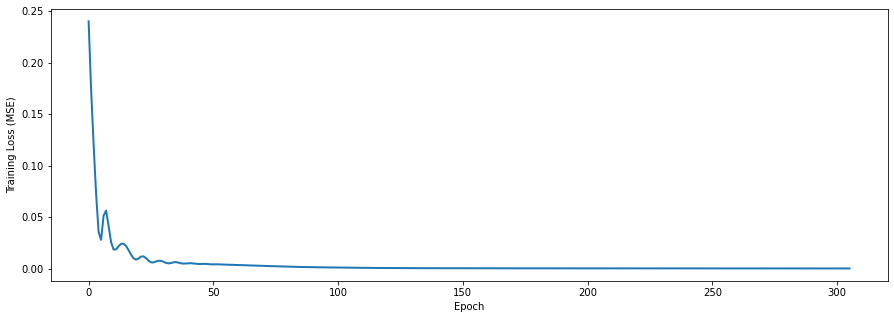

In [101]:

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(loss_curve[:], lw=2)
ax.set_xlabel("Epoch")
ax.set_ylabel("Training Loss (MSE)")
plt.show()

In [102]:
# # LSTM expects input of (batch, sequence, features)
# # So shape should be (1, 179, 20)
# test_dataset = [test_series[i:i+20] for i in range(len(train_series)-look_back)]
# test_dataset = torch.stack(test_dataset).unsqueeze(0)

# with torch.no_grad():
#     test_predictions = model(test_dataset).squeeze()

In [103]:
# X_val_lt shape: torch.Size([3179, 100])
# Y_val_lt shape: torch.Size([3179, 200])

In [104]:
X_val_lt[:,1].shape

torch.Size([3179])

In [105]:
# LSTM expects input of (batch, sequence, features)
# So shape should be (1, 179, 20)
test_dataset = X_val_lt.unsqueeze(0)
with torch.no_grad():
    test_predictions = model(test_dataset).squeeze()



In [106]:
test_dataset[0,1,].shape

torch.Size([100])

In [107]:
test_predictions.shape

torch.Size([3179])

In [108]:
test_predictions[1]

tensor(0.4582, dtype=torch.float64)

C:\Users\Rania\AppData\Local\Temp/ipykernel_25424/3322916708.py:12: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


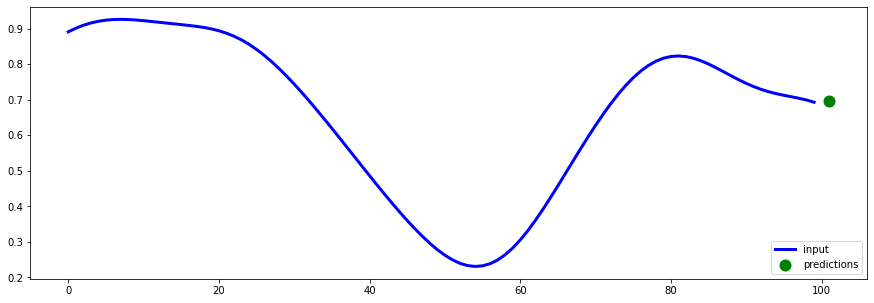

In [109]:
x1 = np.arange(0,100)
x2 = 101
s =400

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
# ax.plot(X_train,y_train, lw=2, label='train data')
# ax.plot(X_test,y_test, lw=3, c='y', label='test data')
plt.plot(x1, test_dataset[0,s,:].reshape(-1,1).squeeze(), lw=3, c='b', label='input')
plt.scatter(x2, test_predictions[s], lw=6, c='g', label='predictions')

ax.legend(loc="lower right")
plt.show()

In [110]:
extrapolation = []
seed_batch = test_dataset[0,s,:].reshape(1, 1, 100)
current_batch = seed_batch
with torch.no_grad():
    for i in range(200):
        predicted_value = model(current_batch)
        extrapolation.append(predicted_value.item())
        current_batch = torch.cat((current_batch[:,:,1:], predicted_value), axis=2)

C:\Users\Rania\AppData\Local\Temp/ipykernel_25424/2299808046.py:13: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


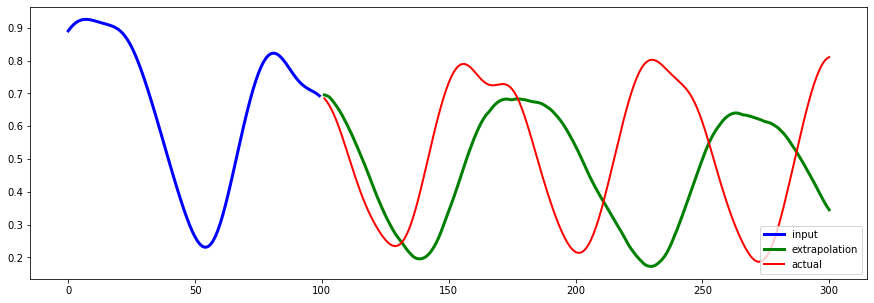

In [111]:
x1 = np.arange(0,100)
x2 = 101
x3 = np.arange(101,301)

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
# ax.plot(X_train,y_train, lw=2, label='train data')
# ax.plot(X_test,y_test, lw=3, c='y', label='test data')
plt.plot(x1, test_dataset[0,s,:].reshape(-1,1).squeeze(), lw=3, c='b', label='input')
plt.plot(x3, extrapolation, lw=3, c='g', label='extrapolation')
plt.plot(x3, Y_val_lt[s,:], lw = 2, c='r', label='actual' )

ax.legend(loc="lower right")
plt.show()

In [111]:
# x = np.arange(110,200,0.5)
# fig, ax = plt.subplots(1, 1, figsize=(15, 5))
# # ax.plot(X_train,y_train, lw=2, label='train data')
# ax.plot(X_test,y_test, lw=3, c='y', label='test data')
# ax.plot(x,extrapolation, lw=3, c='r',linestyle = ':', label='extrapolation')
# ax.legend(loc="lower left")
# plt.show();

In [ ]:
# X_train = np.arange(0,50,0.5) 
# y_train = np.sin(X_train) + np.sin(3*X_train)/3 + np.sin(5*X_train)/5

# X_test  = np.arange(50,100,0.5) 
# y_test  = np.sin(X_train) + np.sin(3*X_train)/3 + np.sin(5*X_train)/5

# train_series = y_train
# test_series  = y_test